1. Imports & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

2. Load the Data

In [2]:
df = pd.read_csv('../datasets/german_credit_risk.csv')

3. Initial Inspection

In [3]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0


In [4]:
# Drop unnamed index column if exists
df.drop(columns=[col for col in df.columns if "unnamed" in col.lower()], inplace=True)

4. Missing Value Handling

In [5]:
df.fillna({
    'Saving accounts': 'no_info',
    'Checking account': 'no_info'
}, inplace=True)

5. Encode Target Variable

In [6]:
# Convert 'Risk' to binary: good (0), bad (1)
df['Risk_binary'] = df['Risk'].apply(lambda x: 1 if x == 'bad' else 0)

6. Exploratory Data Analysis

Risk Distribution,  Credit History vs Defaulted,  Correlation Heatmap

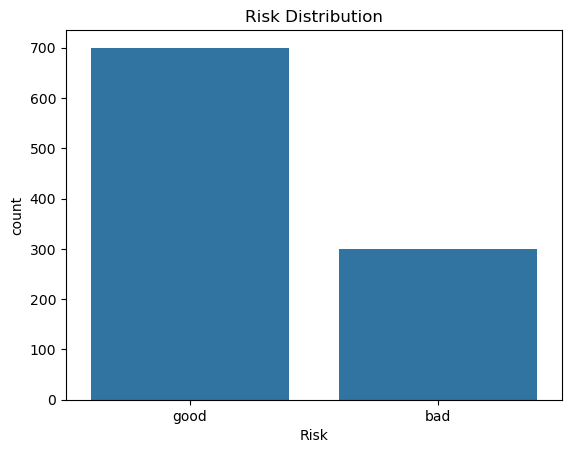

In [7]:
sns.countplot(x='Risk', data=df)
plt.title("Risk Distribution")
plt.show()

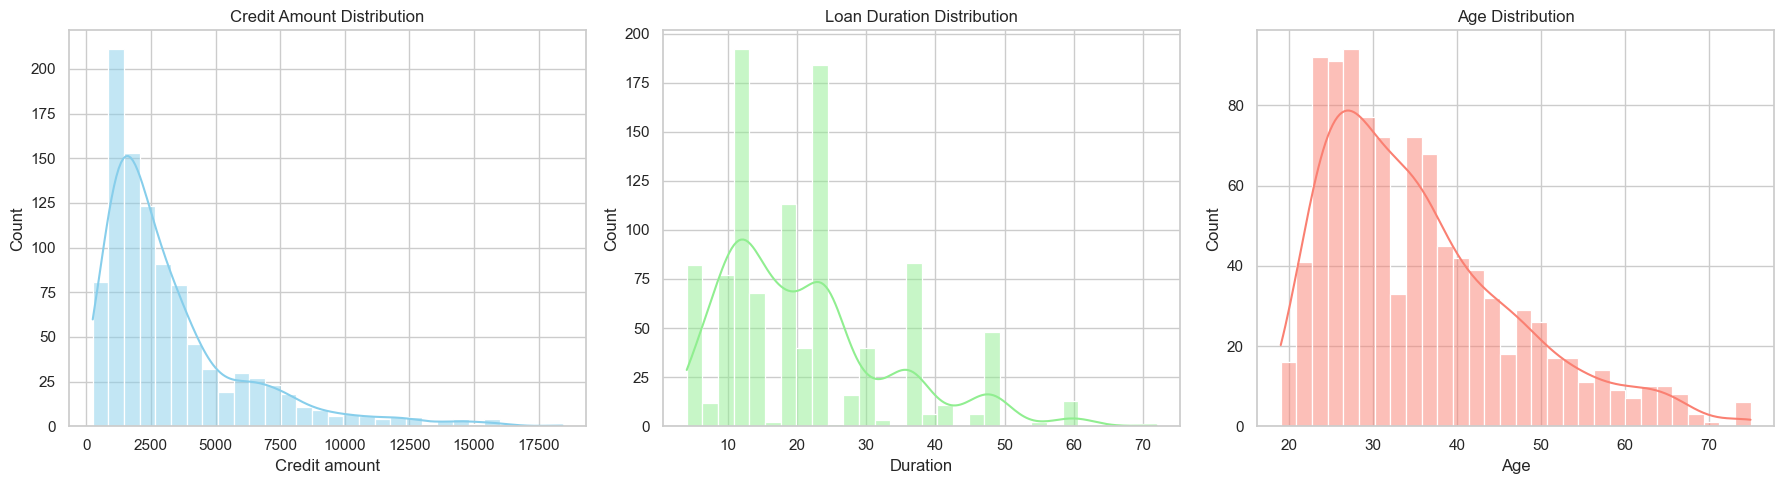

In [8]:
# Set Seaborn theme
sns.set(style="whitegrid")

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Credit Amount
sns.histplot(df['Credit amount'], kde=True, bins=30, ax=axes[0], color='skyblue')
axes[0].set_title("Credit Amount Distribution")

# Plot Duration
sns.histplot(df['Duration'], kde=True, bins=30, ax=axes[1], color='lightgreen')
axes[1].set_title("Loan Duration Distribution")

# Plot Age
sns.histplot(df['Age'], kde=True, bins=30, ax=axes[2], color='salmon')
axes[2].set_title("Age Distribution")

plt.tight_layout()
plt.show()

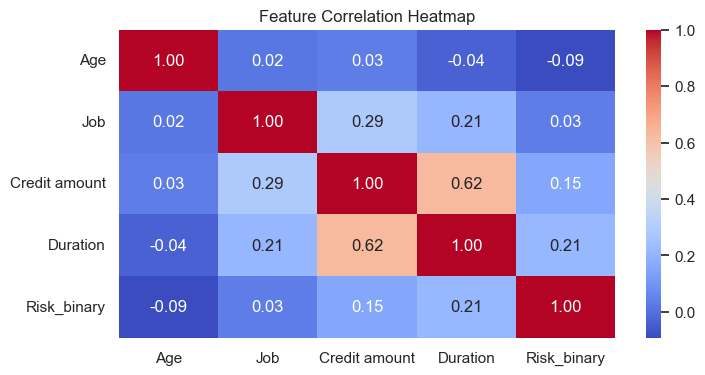

In [9]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

7. Feature Selection

In [10]:
features = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
            'Checking account', 'Credit amount', 'Duration', 'Purpose']
target = 'Risk_binary'

8. Prepare Features and Target

a) Define X and y:

In [11]:
X = df[features]
y = df[target]

b) One-Hot Encode Categorical Columns

In [12]:
categorical_cols = ['Sex', 'Job', 'Housing', 'Saving accounts',
                    'Checking account', 'Purpose']

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

c) Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

9. Scale Numerical Features

In [14]:
scaler = StandardScaler()

numeric_cols = ['Age', 'Credit amount', 'Duration']

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

10. XGBoost Model

In [15]:
model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

11. Evaluation

In [16]:
y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.785

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       140
           1       0.67      0.57      0.61        60

    accuracy                           0.79       200
   macro avg       0.75      0.72      0.73       200
weighted avg       0.78      0.79      0.78       200



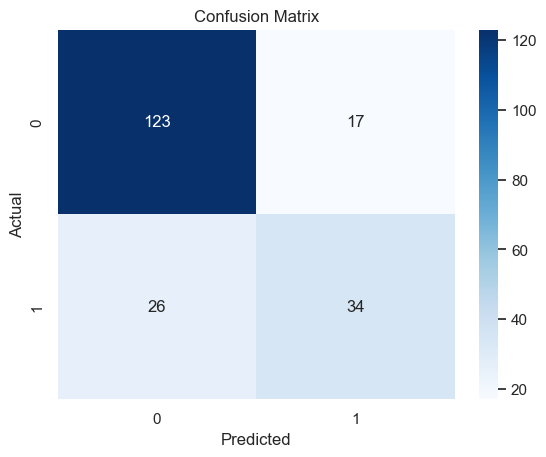

In [17]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
# Sample prediction output
X_test_sample = X_test.copy()
results_df = X_test_sample.copy()
results_df['Actual'] = y_test.values
results_df['Predicted'] = y_pred
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

# Select subset of columns to display
columns_to_show = ['Actual', 'Predicted', 'Correct', 'Age', 'Credit amount', 'Duration', 'Job_1', 'Job_2', 'Job_3', 'Housing_own', 'Housing_rent']
results_df_subset = results_df[columns_to_show]

# Show random samples
print("\n Random Sample Predictions:")
results_df_subset.sample(10)


 Random Sample Predictions:


,Actual,Predicted,Correct,Age,Credit amount,Duration,Job_1,Job_2,Job_3,Housing_own,Housing_rent
107,0,0,True,-0.301108,1.081042,-0.742595,False,True,False,True,False
129,1,0,False,-0.572886,0.115802,-0.742595,False,True,False,True,False
537,0,0,True,0.151856,0.158094,-0.234548,False,True,False,True,False
220,0,1,False,-0.844664,-0.959847,-0.742595,True,False,False,True,False
522,1,1,True,1.601341,1.470655,2.305686,False,True,False,False,False
608,0,0,True,-0.210515,-0.426139,-0.234548,False,True,False,True,False
802,0,0,True,-1.025850,0.405112,-0.065199,False,True,False,True,False
677,1,1,True,-1.025850,0.900270,4.337873,False,True,False,True,False
317,0,0,True,1.148377,0.434679,0.273499,True,False,False,True,False
228,1,0,False,-1.207036,-0.640595,-0.996618,False,True,False,True,False


In [20]:
import joblib

# Save the trained model
joblib.dump(model, "../saved_models/credit_scoring_model_german_dataset---xgboost.joblib")

# Save the test data
joblib.dump(X_test, "../saved_models/credit_scoring_model_german_dataset---xgboost-X_test.joblib")
joblib.dump(y_test, "../saved_models/credit_scoring_model_german_dataset---xgboost-y_test.joblib")

['../saved_models/credit_scoring_model_german_dataset---xgboost-y_test.joblib']